In [ ]:
import pandas as pd
import json

In [31]:
# Read JSON file
with open('37.json', 'r', errors="ignore") as f:
    game = json.load(f)
df = pd.json_normalize(game, sep='_')
df


,id,index,period,timestamp,minute,second,possession,duration,type_id,type_name,...,bad_behaviour_card_id,bad_behaviour_card_name,dribble_no_touch,clearance_aerial_won,substitution_outcome_id,substitution_outcome_name,substitution_replacement_id,substitution_replacement_name,pass_cut_back,pass_goal_assist
0,0522da4d-230e-484f-86e4-71dc959819a3,1,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,f239eb4d-7a0e-4b9e-9308-79080321043d,2,1,00:00:00.000,0,0,1,0.000000,35,Starting XI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,8b8c2e3e-d2d0-4985-87b1-2074dceeaa54,3,1,00:00:00.000,0,0,1,0.000000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,d2c75d63-1a5b-4e13-8d2f-efb22b5ea587,4,1,00:00:00.000,0,0,1,0.000000,18,Half Start,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,99a81794-a73e-41c5-b1aa-38c039bc8940,5,1,00:00:00.897,0,0,2,0.847361,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4878,486d9676-63c4-464c-9a1a-e01e5cee0c61,4879,4,00:16:03.423,121,3,246,0.162089,30,Pass,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4879,4932445c-c1f0-4c71-a320-4f7926733a05,4880,4,00:16:03.586,121,3,246,0.000000,6,Block,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4880,e0293a6a-1cce-4a2c-9675-04042f7d669b,4881,4,00:16:06.984,121,6,246,0.000000,9,Clearance,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4881,a4e2948c-92b4-48ef-a3a8-9a5cb078c5e7,4882,4,00:16:08.708,121,8,246,0.000000,34,Half End,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2024-01-17 12:41:55.143 
  command:

    streamlit run c:\Users\Letic\anaconda3\envs\camp\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


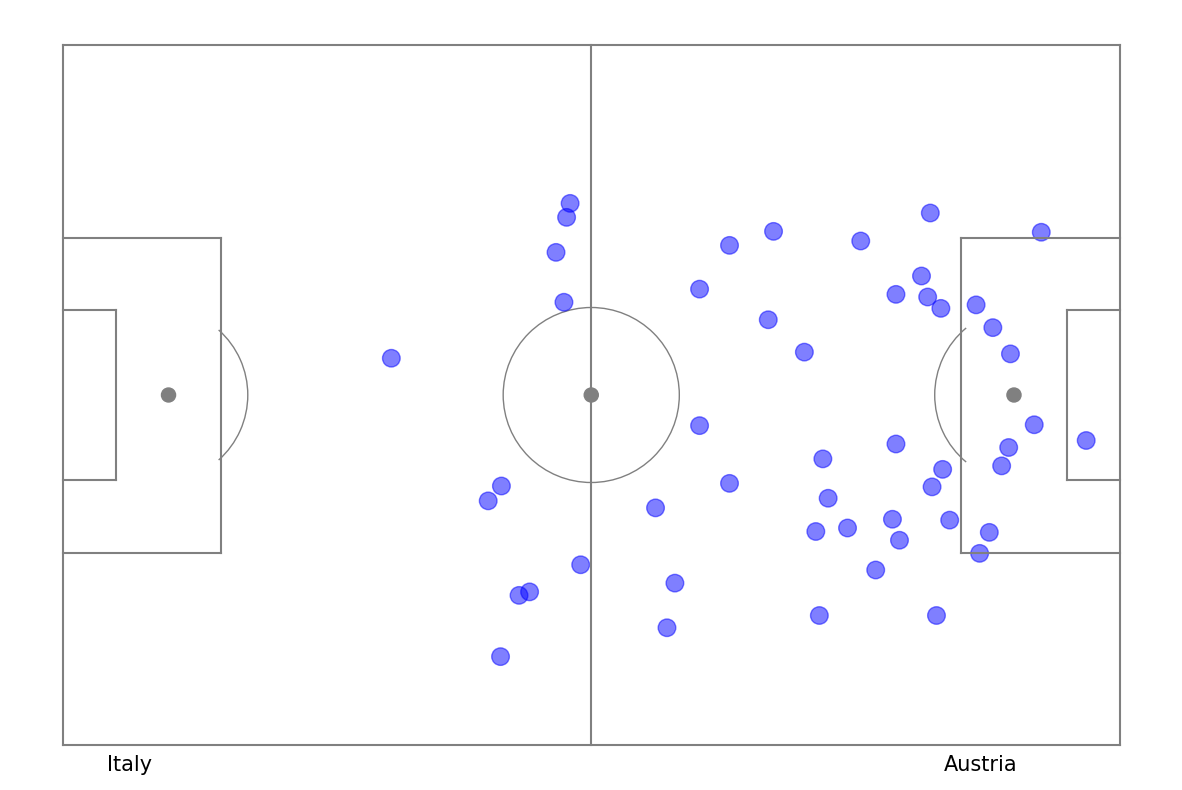

In [1]:
import numpy as np
import pandas as pd
import json
import streamlit as st
import unicodedata
from matplotlib import pyplot as plt
from FCPython import createPitch


# Create pitch plot
pitch_width = 120
pitch_height = 80
fig, ax = createPitch(pitch_width, pitch_height, 'yards', 'gray')


# List of games and JSON files as dictionary
games_dict = {
    '1/8. Belgium - Portugal 1:0': '37',
    '1/8. Belgium - italy 1:0': '37'
}

games_list = list(games_dict.keys())
games_id_list = list(games_dict.values())


# Set page config
st.set_page_config(page_title='Football Game Stats', page_icon=':soccer:', initial_sidebar_state='expanded')

# Drop-down menu "Select Football Game"
st.sidebar.markdown('## Select Football Game')
menu_game = st.sidebar.selectbox('Select Game', games_list, index=1)
st.sidebar.markdown("""Here you can select one of 15 football games from the UEFA Euro 2020 knockout stage: """)
st.sidebar.markdown(""" 
                    * eight games in the round of 16
                    * four quarter-finals
                    * two semi-finals
                    * one final
                    """)


# Read JSON file based on selected game
filename = str(games_dict.get(menu_game))+'.json'
with open(filename, 'r', errors="ignore") as f:
    game = json.load(f)
df = pd.json_normalize(game, sep='_')


# Replace non-unicode characters in players names
df['player_name'] = df['player_name'].astype(str)
df['player_name'] = df['player_name'].apply\
    (lambda val: unicodedata.normalize('NFC', val).encode('ascii', 'ignore').decode('utf-8'))
df['player_name'] = df['player_name'].replace('nan', np.nan)


# Get teams and players names
team_1 = df['team_name'].unique()[0]
team_2 = df['team_name'].unique()[1]
mask_1 = df.loc[df['team_name'] == team_1]
mask_2 = df.loc[df['team_name'] == team_2]
player_names_1 = mask_1['player_name'].dropna().unique()
player_names_2 = mask_2['player_name'].dropna().unique()


# List of activities for drop-down menus
activities = ['Pass', 'Ball Receipt', 'Carry', 'Pressure', 'Shot']


# Drop-down menus 'Select Team, Player and Activity'
st.sidebar.markdown('## Select Player and Activity')
menu_team = st.sidebar.selectbox('Select Team', (team_1, team_2))
if menu_team == team_1:
    menu_player = st.sidebar.selectbox('Select Player', player_names_1)
else:
    menu_player = st.sidebar.selectbox('Select Player', player_names_2)
menu_activity = "Pass"
st.sidebar.markdown('Select a player and activity. Statistics plot will appear on the pitch.')


# Titles and text above the pitch
st.title('Football Game Stats')
st.markdown("""
The knockout phase of UEFA Euro 2020 took place between 26 June 2021 and 11 July 2021. It consisted of 
15 matches between 16 teams successfully qualified from the group stage. In the final game in London Italy 
won England on penalty kicks and took the trophy second time in their history.
""")
st.write("""* Use dropdown-menus on the left side to select a game, team, player, and activity. 
Statistics plot will appear on the pitch below.""")
st.write('###', menu_activity, 'map')
st.write('###### Game:', menu_game)
st.write('###### Player:', menu_player, '(', menu_team, ')')


# Define five functions for five activities from drop-down menu

# Pass plot function
def pass_map():
    df_pass = df.loc[(df['player_name'] == menu_player) & (df['type_name'] == 'Pass')]
    location = df_pass['location'].tolist()
    pass_end_location = df_pass['pass_end_location'].tolist()
    color = 'blue' if menu_team == team_1 else 'red'
    if menu_team == team_1:
        x1 = np.array([el[0] for el in location])
        y1 = pitch_height-np.array([el[1] for el in location])
        x2 = np.array([el[0] for el in pass_end_location])
        y2 = pitch_height-np.array([el[1] for el in pass_end_location])
    else:
        x1 = pitch_width-np.array([el[0] for el in location])
        y1 = np.array([el[1] for el in location])
        x2 = pitch_width-np.array([el[0] for el in pass_end_location])
        y2 = np.array([el[1] for el in pass_end_location])
    u = x2-x1
    v = y2-y1
    ax.quiver(x1, y1, u, v, color=color, width=0.003, headlength=4.5)
    return ax


# Ball Receipt plot function
def ball_receipt_map():
    df_ball_rec = df.loc[(df['player_name'] == menu_player) & (df['type_name'] == 'Ball Receipt*')]
    location = df_ball_rec['location'].tolist()
    dot_size = 1
    color = 'blue' if menu_team == team_1 else 'red'
    if menu_team == team_1:
        x = np.array([el[0] for el in location])
        y = pitch_height-np.array([el[1] for el in location])
    else:
        x = pitch_width-np.array([el[0] for el in location])
        y = np.array([el[1] for el in location])
    for x, y in zip(x, y):
        dot = plt.Circle((x, y), dot_size, color=color, alpha=0.5)
        ax.add_patch(dot)
    return ax


# Carry plot function
def carry_map():
    df_carry = df.loc[(df['player_name'] == menu_player) & (df['type_name'] == 'Carry')]
    location = df_carry['location'].tolist()
    carry_end_location = df_carry['carry_end_location'].tolist()
    color = 'blue' if menu_team == team_1 else 'red'
    if menu_team == team_1:
        x1 = np.array([el[0] for el in location])
        y1 = pitch_height-np.array([el[1] for el in location])
        x2 = np.array([el[0] for el in carry_end_location])
        y2 = pitch_height-np.array([el[1] for el in carry_end_location])
    else:
        x1 = pitch_width-np.array([el[0] for el in location])
        y1 = np.array([el[1] for el in location])
        x2 = pitch_width-np.array([el[0] for el in carry_end_location])
        y2 = np.array([el[1] for el in carry_end_location])
    u = x2-x1
    v = y2-y1
    ax.quiver(x1, y1, u, v, color=color, width=0.003, headlength=4.5)
    return ax


# Pressure plot function
def pressure_map():
    df_pressure = df.loc[(df['player_name'] == menu_player) & (df['type_name'] == 'Pressure')]
    location = df_pressure['location'].tolist()
    dot_size = 2
    color = 'blue' if menu_team == team_1 else 'red'
    if menu_team == team_1:
        x = np.array([el[0] for el in location])
        y = pitch_height-np.array([el[1] for el in location])
    else:
        x = pitch_width-np.array([el[0] for el in location])
        y = np.array([el[1] for el in location])
    for x, y in zip(x, y):
        dot = plt.Circle((x, y), dot_size, color=color, alpha=0.5)
        ax.add_patch(dot)
    return ax


# Shot plot function
def shot_map():
    df_shot = df.loc[(df['player_name'] == menu_player) & (df['type_name'] == 'Shot')]
    location = df_shot['location'].tolist()
    color = 'blue' if menu_team == team_1 else 'red'
    if menu_team == team_1:
        x1 = np.array([el[0] for el in location])
        y1 = pitch_height-np.array([el[1] for el in location])
        x2 = np.full((len(x1)), 120)
        y2 = np.full((len(y1)), 40)
    else:
        x1 = pitch_width-np.array([el[0] for el in location])
        y1 = np.array([el[1] for el in location])
        x2 = np.full((len(x1)), 0)
        y2 = np.full((len(y1)), 40)
    u = x2-x1
    v = y2-y1
    ax.quiver(x1, y1, u, v, color=color, width=0.005, headlength=4.5)
    return ax


# Get plot function based on selected activity
if menu_activity == 'Pass':
    ax = pass_map()
elif menu_activity == 'Ball Receipt':
    ax = ball_receipt_map()
elif menu_activity == 'Carry':
    ax = carry_map()
elif menu_activity == 'Pressure':
    ax = pressure_map()
else:
    ax = shot_map()

# Plot the figure
plt.text(5, -3, team_1, size=15)
plt.text(100, -3, team_2, size=15)
fig.set_size_inches(15, 10)
st.pyplot(fig)


# Text underneath the pitch
st.write('##### Line-ups')
st.write(team_1, ':')
st.write(', '.join(str(e) for e in player_names_1))
st.write(team_2, ':')
st.write(', '.join(str(e) for e in player_names_2))
st.subheader('About this app')
plt.show()

